# 1. Apple App Store apps and reviews

Everyone uses mobile apps nowadays - from video games to task managers. As technology gets more advanced, mobile apps becomes easier to create. There are even services that allow individuals with zero coding experiencce to create web and mobile apps now. Consequently, the growth of the number of apps in the App Store have risen tremendously over the years.

We will do an exploratory data analysis of the App Store, Apple's app market and hopefully gain valuable insights to be able to answer questions like: "Do app ratings affect the price of an app, or is it the other way around?"

Our dataset is a modified file retrieved from Kaggle.com:
- `AppleStoreData.csv`: Contains details of approximately 7000 number of apps in the App Store. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps_with_duplicates = pd.read_csv('AppleStoreData.csv', index_col = 0)

# Drop all duplicates
apps = apps_with_duplicates.drop_duplicates()

# Dropping the first unnecessary column 
apps.drop('Unnamed: 0.1', axis = 1, inplace = True)

print('Total number of apps in the dataset = ', len(apps))

print('\n')

# Observe a random sample of n rows
n = 4
apps.sample(n)

Total number of apps in the dataset =  7197




,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3407,961662290,Lords & Castles - Medieval War Strategy MMO Games,251610112,USD,$ 0.0,439,4,4.0,3.5,1.59,12+,Games,38,5,10,1
5003,1068416637,Zenge,449143808,USD,$ 0.99,194,194,4.5,4.5,1.0,4+,Games,38,5,1,1
856,444844790,Scribblenauts Remix,209452032,USD,$ 0.99,86127,179,4.5,4.0,7.1,9+,Games,40,5,2,1
5238,1076619087,HISTORY Vault,51880960,USD,$ 0.0,239,24,4.0,4.5,2.2,12+,Entertainment,37,5,1,1


# 2. Data cleaning

We will be working a lot with the columns `price`, `user_rating`, `size_bytes`. It is crucial to first look at the types of these columns. We can do this fast enough using the `info()` method. 

In [3]:
# Print a concise summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   object 
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory 

As seen above, the `price` column is of type `object`, pandas datatype for a `string`, and not `float64` as we would expect. This is because the `price` column contains the `$` sign. We would need to remove this first, and then convert it to `float64`.

In [4]:
# remove the $ sign
apps['price']  = apps['price'].astype(str).str.replace('$', '')

# change the datatype to float64
apps['price'] = pd.to_numeric(apps['price'])

# check that indeed the datatype is not float64
apps['price'].dtype

dtype('float64')

It also seems that we will not be working with the last 4 columns. Having them may obstruct our analysis process.

In [5]:
print(apps.shape)

# Remove the last 4 columns
last_four_columns = apps.columns[-4:]
apps.drop(last_four_columns, axis = 1, inplace = True)

# Verify that the columns are indeed reduced
print(apps.shape)
print(apps.columns)

(7197, 16)
(7197, 12)
Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre'],
      dtype='object')


# 3. Is there any linear correlation between the columns?

In any exploratory data analysis, it would be wise to ask these little simple questions. Is there any linear correlation between the columns of this dataframe? This question can be answered pretty fast using pandas `corr()` method together with seaborn's `heatmap` plot.

As we see below, there is no strong linear relationship between any two columns (except for `user_rating` and `user_rating_ver` which are almost the same thing). However, as years of doing statistics have taught us, no linear relationship does not mean that there is no relationship. 

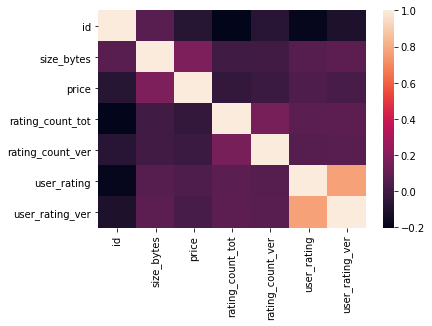

In [6]:
sns.heatmap(apps.corr())

# 4. What app categories do we have?

With Apple having 1.4 billion active devices (<a href="https://9to5mac.com/2020/01/28/apple-hits-1-5-billion-active-devices-with-80-of-recent-iphones-and-ipads-running-ios-13/">source</a>), the Apple App Store remains a significant digital distribution platform. As far as businesses are concerned, it is a platform to grow and reach their target audience. It is important for businesses to utilize the App Store's grouping feature with group apps according to their prime genre.

This gives rise to some interesting questions:
- Is there any specific genre that is dominating the market?
- Which genre has the highest share of apps in the market?
- Are there any genres with fewer than 50 apps?

Number of categories is: 23


Genres with fewer than 50 apps: 
Navigation    46
Medical       23
Catalogs      10
Name: prime_genre, dtype: int64


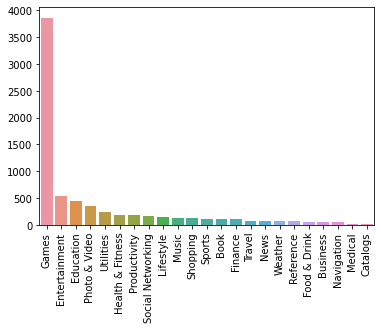

In [7]:
# Get and print the total number of unique genres
num_genres = len(apps['prime_genre'].unique())
print('Number of categories is:', num_genres)

print('\n')

# Count the number of apps in each 'prime_genre' and sorting them in descending order
num_apps_per_genre = apps['prime_genre'].value_counts().sort_values(ascending = False)

# Print the genres with fewer than 50 apps 
print('Genres with fewer than 50 apps: ')
print(num_apps_per_genre[num_apps_per_genre < 50])

sns.barplot(num_apps_per_genre.index,  # index = category name
            num_apps_per_genre.values)  # value = count

plt.xticks(rotation = 90)

plt.show()

On one glance, it is obvious that the Games genre is dominating the App Store. On top of that, we see that there are three categories with fewer than 50 apps. A further in-depth analysis could reveal if any of these apps are really up to today's standard. This is relevant to do as a business can dominate these genres by creating a fresh, novel and better app.

# 5. How are app ratings distributed?

App ratings (ranging from 0, lowest, to 5, highest) plays an important role in portraying the brand image of the app (and company behind it). Furthermore, since the App Store is sorted, apps with higher ratings would be at the top of the list compared to lower rated apps. This impacts discoverability of the app.

In [8]:
# Get only apps with rating > 0
positive_ratings = apps[apps['user_rating'] > 0]

# Average app rating
avg_app_rating = positive_ratings['user_rating'].mean()
print('Average app rating is:', avg_app_rating)

# Average app rating grouped by genres
avg_rating_per_genres = positive_ratings.groupby('prime_genre')['user_rating'].mean().sort_values(ascending = False)
print(avg_rating_per_genres)

Average app rating is: 4.049696873005743
prime_genre
Book                 4.269231
Catalogs             4.200000
Health & Fitness     4.188679
Games                4.185735
Reference            4.169811
Productivity         4.145349
Music                4.097015
Photo & Video        4.081538
Shopping             4.075472
Business             4.028302
Navigation           3.983871
Education            3.952196
Weather              3.924242
Medical              3.875000
Food & Drink         3.855769
Travel               3.852113
News                 3.725000
Social Networking    3.720149
Utilities            3.712329
Entertainment        3.687898
Lifestyle            3.575221
Finance              3.563380
Sports               3.366337
Name: user_rating, dtype: float64


In [9]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Distribution of apps with respect to ratings
fig = [go.Histogram(
        x = positive_ratings['user_rating'],
        nbinsx = 10
)]

# # Vertical dashed line to indicate mean app rating value
layout = {'shapes': [{
                'type' : 'line',
                'x0' : avg_app_rating,
                'y0' : 0,
                'x1' : avg_app_rating,
                'y1' : 3000,
                'line' : { 'dash' : 'dashdot'}
}]  
}

plotly.offline.iplot({'data':fig, 'layout': layout})

Our research above shows that the average amount of ratings across all genres is `4.05`. The histogram is positively skewed indicating that majority of the apps are highly rated and close to the mean value.

# 6. App price, size and ratings

It is relevant to look at the app price.  Not everyone would buy an app it if it too expensive, or it if it does not seem worth it to purchase. Almost as relevant, the size of an app also plays a role in how users perceive it. If it is too large, download times can increase tremendously. Not to mention, that it will consume a huge portion of the user's mobile storage.

This leads to the following questions:
- Is there a relation between the price of an app and its rating?
- Would it be true that more cheaper apps are favoured over more expensive apps?
- Would the size of an app affect its rating?

In [10]:
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Filter rows where user_rating is null or size is null or zero
null_ratings = apps[apps['user_rating'].isna()]
null_size = apps[apps['size_bytes'].isna()]
zero_size = apps[apps['size_bytes'] == 0]

# Check if there are any NaN rows
assert len(null_ratings) == 0
assert len(null_size) == 0
assert len(zero_size) == 0

Since there are no rows with null values in `user_rating` and `size_bytes`, and no rows with `0` size, we can proceed to use our `positive_ratings` dataframe defined previously as we are only interested with apps with more than 0 rating. 

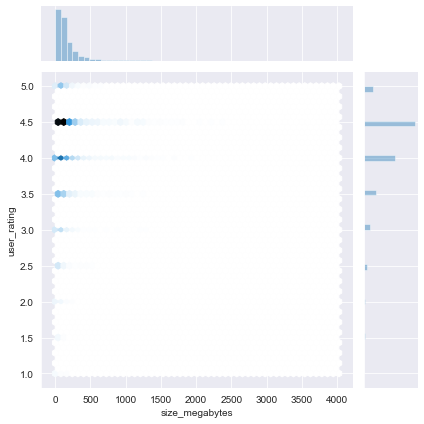

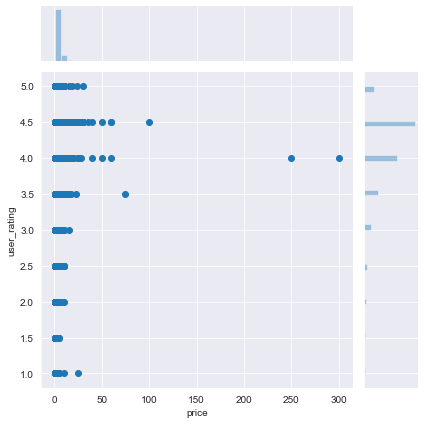

In [11]:
# Create a new column converting bytes to megabytes
positive_ratings['size_megabytes'] = positive_ratings['size_bytes'] / (10 ** 6)

# Subset for genres with at least 200 apps
big_genres = positive_ratings.groupby('prime_genre').filter(lambda gen: len(gen) >= 200).reset_index()

# Size against rating plot
plot1 = sns.jointplot(x = big_genres['size_megabytes'],
                      y = big_genres['user_rating'],
                      kind = 'hex')

# Subset for apps which are paid
priced_apps = positive_ratings[positive_ratings['price'] > 0]

# Size against price plot
plot2 = sns.jointplot(x = priced_apps['price'], 
                      y = priced_apps['user_rating'])

It seems that a lot of apps rated 4 and above range from 2 MB to 500 MB. It is also clear that a lot of these top rated apps are priced below $45.

# 7. A relationship between app category and app price?

This is where things get both complicated and interesting. There are many factors needed to be taken into consideration when a company want to devise a right pricing strategy for a certain app. Too expensive, and people would not even bother to try the app. Too cheap, then how would the company pay their developers?

It is thus worth noting that price ranges should depend on the genre of the app. Apps that begs user to use it everyday like task managers can be kept at a smaller price. However, apps that require professional certification would definitely need to be priced higher considering its low supply and high cost of developing.

                          track_name   price prime_genre
115   Proloquo2Go - Symbol-based AAC  249.99   Education
1136        Articulation Station Pro   59.99   Education
1479             LAMP Words For Life  299.99   Education
2181    Articulation Test Center Pro   59.99   Education


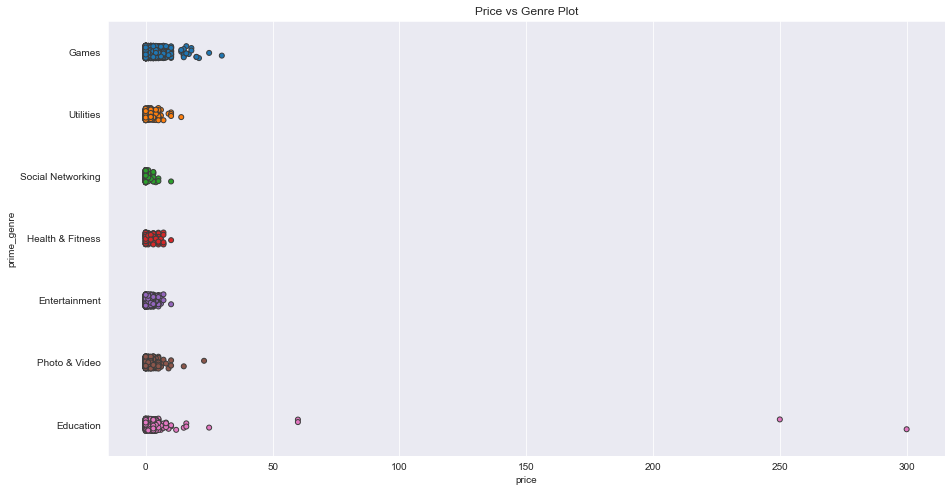

In [12]:
# we have imported matplotlib.pyplot
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Subset on a popular app genres (based on previous observation)
popular_genres = ['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities', 'Health & Fitness', 'Produtivity', 'Social Networking']
popular_app_genres = positive_ratings[positive_ratings['prime_genre'].isin(popular_genres)]

# Observing the price trend in `price` vs `prime_genre`
ax = sns.stripplot(x = popular_app_genres['price'],
                   y = popular_app_genres['prime_genre'],
                   jitter = True, 
                   linewidth = 1)
ax.set_title('Price vs Genre Plot')

# Apps with `price` greater than 50
apps_above_50 = popular_app_genres[['track_name', 'price', 'prime_genre']][popular_app_genres['price'] > 50]
print(apps_above_50)

It seems that the very expensive apps are relevant non-junk apps. A quick Google search shows that the most expensive app `LAMP Words For Life` is a <a href="https://aacapps.com">legit product</a> on the market. How about we focus on the cheaper apps to see a clearer distribution of apps under $50.

Text(0.5, 1.0, 'Price vs Genre Plot')

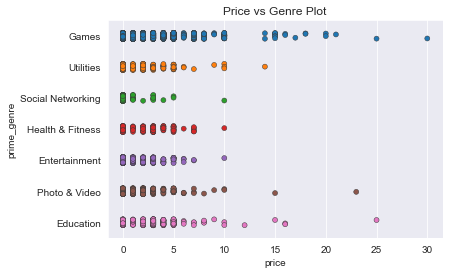

In [13]:
# Apps with `price` below 50
apps_below_50 = popular_app_genres[['track_name', 'price', 'prime_genre']][popular_app_genres['price'] < 50]

# Observing the price trend in `price` vs `prime_genre`
ax = sns.stripplot(x = apps_below_50['price'],
                   y = apps_below_50['prime_genre'],
                   jitter = True, 
                   linewidth = 0.5)
ax.set_title('Price vs Genre Plot')

The distribution is now better and clearer. Out of curiosity, let's take a look at some of those expensive apps (relative to this distribution).

In [14]:
above_20_below_50 = popular_app_genres[['track_name', 'price', 'prime_genre', 'user_rating']][(popular_app_genres['price'] > 20) & (popular_app_genres['price'] < 50)]

print(above_20_below_50)

                                track_name  price    prime_genre  user_rating
419                  AnkiMobile Flashcards  24.99      Education          4.0
911                            STEINS;GATE  24.99          Games          4.0
2833                  Extreme Landings Pro  29.99          Games          4.5
4387                       FINAL FANTASY Ⅸ  20.99          Games          4.5
4739  Litchi for DJI Mavic/Phantom/Inspire  22.99  Photo & Video          3.5


As expected, we see some famous apps like `AnkiMobile Flashcards`, an app that has been around for a decade now. The `Litchi for DJI Mavic/Phantom/Inspire` app is an example of a pricey app due to low supply but high demand. Finally, we see two very popular games `Extreme Landings Pro` and `FINAL FANTASY IX`.